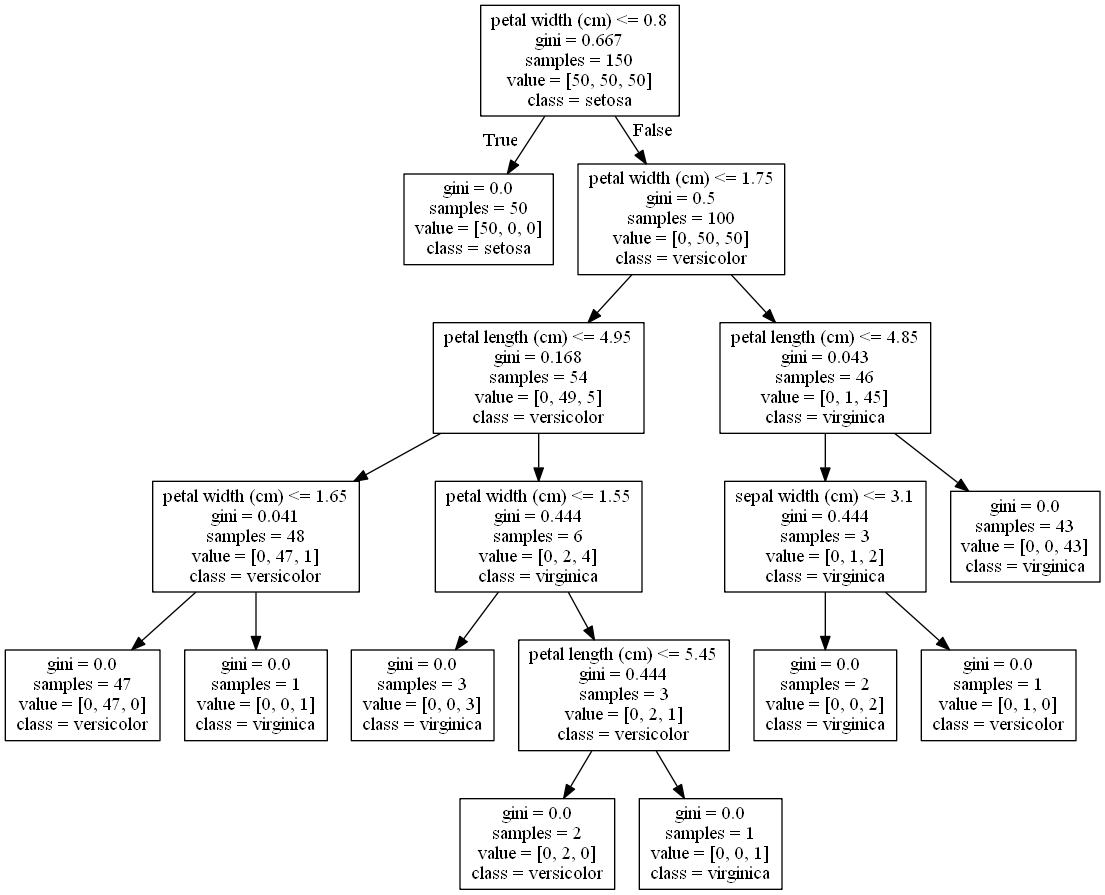

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target


# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)


# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [50]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# data = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_transaction.csv") 
# data.to_pickle("F:\Kaggle\IEEE_CIS\Data\\train_transaction.pkl")
# data = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_identity.csv") 
# data.to_pickle("F:\Kaggle\IEEE_CIS\Data\\train_identity.pkl")

In [2]:
# trans = pd.read_pickle("F:\Kaggle\IEEE_CIS\Data\\train_transaction.pkl")
# ident = pd.read_pickle("F:\Kaggle\IEEE_CIS\Data\\train_identity.pkl")

In [4]:
trans = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_transaction.csv", nrows=500) 
ident = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_identity.csv", nrows=500) 
trans.set_index('TransactionID', inplace=True)
ident.set_index('TransactionID', inplace=True)

In [35]:
# X = trans.drop(['isFraud', 'TransactionDT'], 1)
# X = trans[['TransactionAmt', 'ProductCD', 'card4']].to_numpy()
X1 = trans[['TransactionAmt']].to_numpy()
X2 = trans[['ProductCD']].to_numpy()
X3 = trans[['card4']].to_numpy()
y = trans[['isFraud']].to_numpy()

In [42]:
# Ordinal Encoder for categorical variables (X2 and X3)
enc2 = OrdinalEncoder()
enc3 = OrdinalEncoder()
enc2.fit(X2)
enc3.fit(X3)
enc2.categories_
enc3.categories_
X2_ecd = enc2.transform(X2)
X3_ecd = enc3.transform(X3)
# enc2.inverse_transform(X2_ecd)
# enc3.inverse_transform(X3_ecd)

X = np.concatenate((X1,X2_ecd,X3_ecd),axis=1)

In [87]:
trans = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_transaction.csv", nrows=1000) 
ident = pd.read_csv("F:\Kaggle\IEEE_CIS\Data\\train_identity.csv", nrows=1000)
trans = trans.loc[500:999]
ident = ident.loc[500:999]
trans.set_index('TransactionID', inplace=True)
ident.set_index('TransactionID', inplace=True)

In [89]:
X1 = trans[['TransactionAmt']].to_numpy()
X2 = trans[['ProductCD']].to_numpy()
X3 = trans[['card4']].to_numpy()
y = trans[['isFraud']].to_numpy()
enc2 = OrdinalEncoder()
enc3 = OrdinalEncoder()
enc2.fit(X2)
enc3.fit(X3)
enc2.categories_
enc3.categories_
X2_ecd = enc2.transform(X2)
X3_ecd = enc3.transform(X3)
# enc2.inverse_transform(X2_ecd)
# enc3.inverse_transform(X3_ecd)

X = np.concatenate((X1,X2_ecd,X3_ecd),axis=1)

In [92]:
y_hat = clf.predict(X)

In [105]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, y_hat).ravel()
(tn, fp, fn, tp)

(479, 13, 8, 0)

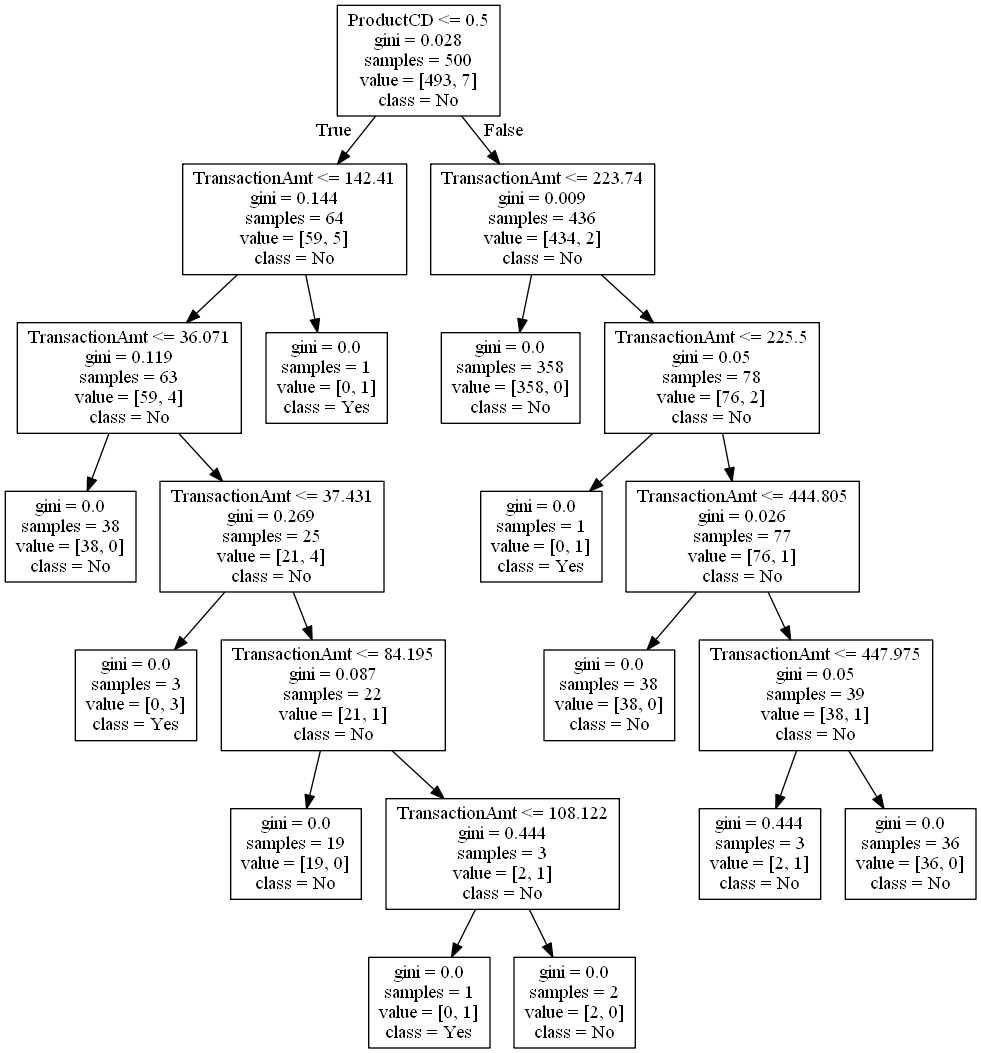

In [66]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(random_state=0)

# Train model
model = clf.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=np.asarray(['TransactionAmt', 'ProductCD', 'card4']),  
                                class_names=np.asarray(['No', 'Yes']))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
# graph.write_pdf("iris.pdf")
# graph.write_png("iris.png")